<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/ARIMA_Modeling_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import statsmodels
print("Statsmodels Version: ", statsmodels.__version__)

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

Statsmodels Version:  0.14.0


In [180]:
import yfinance as yf

# Thai Oil Public Company Limited
# Ticker = TOP.BK

df = yf.download("TOP.BK", start="2023-02-01", end="2023-09-01")
df.fillna(method='bfill', inplace=True) #ถ้ามี null value ใน feature ใดก็ตาม ให้ทำการ replace ด้วย bfill method (เอาค่าก่อนหน้ามาแทนที่)
df.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-25,52.00,53.00,51.75,52.25,51.560406,16733800
2023-08-28,52.75,53.50,52.50,52.75,52.053806,18454400
2023-08-29,53.00,53.00,52.50,52.75,52.053806,9823400
2023-08-30,53.25,53.50,52.75,53.00,52.300507,9948200
2023-08-31,52.75,52.75,50.75,51.50,50.820305,35377000


In [181]:
# Import as Dataframe
df.rename(columns={'Adj Close':'value'}, inplace=True)
print(df.shape)
df

(141, 6)


,Open,High,Low,Close,value,Volume
Date,,,,,,
2023-02-01,58.00,59.00,58.00,58.50,55.983253,9113700
2023-02-02,58.50,58.50,57.25,57.75,55.265518,10622100
2023-02-03,57.75,58.00,56.75,57.25,54.787029,12426400
2023-02-06,56.75,57.50,56.75,57.25,54.787029,5024800
2023-02-07,57.50,58.00,56.75,57.00,54.547783,9125400
...,...,...,...,...,...,...
2023-08-25,52.00,53.00,51.75,52.25,51.560406,16733800
2023-08-28,52.75,53.50,52.50,52.75,52.053806,18454400
2023-08-29,53.00,53.00,52.50,52.75,52.053806,9823400


In [182]:
df1 = df["value"]
df1.reset_index(drop=True, inplace=True)

In [183]:
df1.head(5)

0    55.983253
1    55.265518
2    54.787029
3    54.787029
4    54.547783
Name: value, dtype: float64

In [184]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.955789
p-value: 0.306288


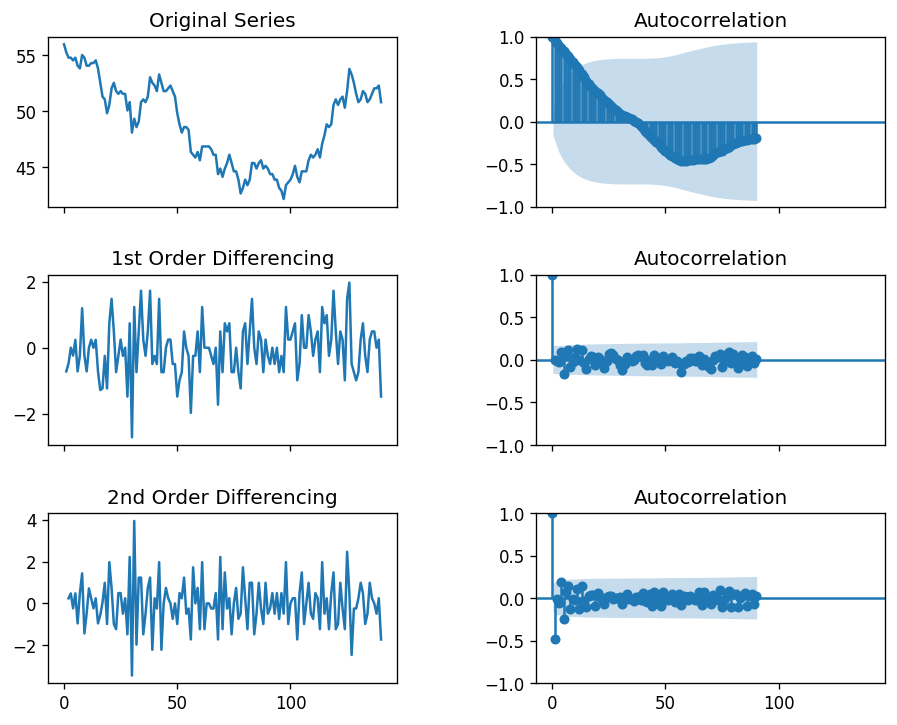

In [185]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
#axes[2, 1].set_xlim(0,90)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots

axes[0, 0].plot(df1)
axes[0, 0].set_title('Original Series')
plot_acf(df1, ax=axes[0, 1], lags=90)  # Set lags to 100
#axes[0, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

# 1st Differencing
axes[1, 0].plot(df1.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.diff().dropna(), ax=axes[1, 1], lags=90)  # Set lags to 100
#axes[1, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

# 2nd Differencing
axes[2, 0].plot(df1.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.diff().diff().dropna(), ax=axes[2, 1], lags=90)  # Set lags to 100
#axes[2, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

plt.show()